# Projeto Técnicas de Programação I

**Membros:**
- Lucas Pedroso
- Guilherme Benvenuto
- Carlos Miguel
- Melissa da Silva

## 1. Base de Dados

In [1]:
#imports para análise de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Leitura do dataset
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
#Listar as colunas
df.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [4]:
#Renomear colunas
df.rename(columns={'age': 'idade', 'job': 'trabalho', 'marital': 'estado_civil', 'education': 'educacao', 'default': 'inadimplente', 'balance': 'saldo_cc','housing': 'emprestimo_imobiliario', 'loan': 'emprestimo_pessoal', 'contact': 'contato', 'day': 'dia', 'month': 'mes', 'day_of_week': 'dia_da_semana', 'duration': 'duracao', 'campaign': 'qtd_emprestimos', 'pdays': 'dias_desde_ultimo_contato', 'previous': 'contatos_anteriores', 'poutcome': 'resultado_anterior', 'emp.var.rate': 'taxa_de_variacao_emprego', 'cons.price.idx': 'indice_de_preco_consumidor', 'cons.conf.idx': 'indice_de_confianca_consumidor', 'euribor3m': 'euribor_3_meses', 'nr.employed': 'nr_empregados'}, inplace=True)
df

,idade,trabalho,estado_civil,educacao,inadimplente,saldo_cc,emprestimo_imobiliario,emprestimo_pessoal,contato,dia,mes,duracao,qtd_emprestimos,dias_desde_ultimo_contato,contatos_anteriores,resultado_anterior,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


**idade**: numérico \
**classe de trabalho**: tipo de trabalho (**categoria**: “admin.”, “desconhecido”, “desempregado”, “gerente”, “empregada doméstica”, “empreendedor”, “estudante”, “operário”, “autônomo”, “ aposentado”, “técnico”, “serviços”) \
**marital** : estado civil (**categoria**: “casado”, “divorciado”, “solteiro”; nota: “divorciado” significa divorciado ou viúvo) \
**educação**: (**categoria**: “desconhecido”, “secundário”, “primário”, “terciário”) \
**default**: tem crédito em default? (**binário**: “sim”, “não”) \
**saldo**: saldo médio anual, em euros (numérico) \
**habitação**: tem crédito à habitação? (**binário**: “sim”, “não”) \
**empréstimo**: tem empréstimo pessoal? (**binário**: “sim”, “não”) \
**contato**: tipo de comunicação do contato (**categoria**: “desconhecido”, “telefone”, “celular”) \
**sexo**: Feminino, Masculino.**dia**: dia do último contato do mês (numérico) \
**mês**: último mês de contato do ano (categorial: “jan”, “fev”, “mar”, …, “nov”, “dez”) \
**duration**: duração do último contato, em segundos (numérico) \
**campanha**: número de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato) \
**pdays**: número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior (numérico, -1 significa que o cliente não foi contatado anteriormente) \
**anterior**: número de contactos realizados antes desta campanha e para este cliente (numérico) \
**poutcome**: resultado da campanha de marketing anterior (**categoria**: “**desconhecido**”, “outro”, “fracasso”, “sucesso”)

In [5]:
#Informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   idade                      4521 non-null   int64 
 1   trabalho                   4521 non-null   object
 2   estado_civil               4521 non-null   object
 3   educacao                   4521 non-null   object
 4   inadimplente               4521 non-null   object
 5   saldo_cc                   4521 non-null   int64 
 6   emprestimo_imobiliario     4521 non-null   object
 7   emprestimo_pessoal         4521 non-null   object
 8   contato                    4521 non-null   object
 9   dia                        4521 non-null   int64 
 10  mes                        4521 non-null   object
 11  duracao                    4521 non-null   int64 
 12  qtd_emprestimos            4521 non-null   int64 
 13  dias_desde_ultimo_contato  4521 non-null   int64 
 14  contatos

In [6]:
#Resumo estatístico descritivo dos campos numéricos
df.describe()

,idade,saldo_cc,dia,duracao,qtd_emprestimos,dias_desde_ultimo_contato,contatos_anteriores
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
#Quantidade de linhas e colunas
df.shape

(4521, 17)

In [8]:
#Verifica nome das colunas após alteração
df.columns.to_list()

['idade',
 'trabalho',
 'estado_civil',
 'educacao',
 'inadimplente',
 'saldo_cc',
 'emprestimo_imobiliario',
 'emprestimo_pessoal',
 'contato',
 'dia',
 'mes',
 'duracao',
 'qtd_emprestimos',
 'dias_desde_ultimo_contato',
 'contatos_anteriores',
 'resultado_anterior',
 'y']

In [9]:
#Verifica valor nulo
df_null = df.isnull().sum().sort_values(ascending=True)
df_null

idade                        0
contatos_anteriores          0
dias_desde_ultimo_contato    0
qtd_emprestimos              0
duracao                      0
mes                          0
dia                          0
resultado_anterior           0
contato                      0
emprestimo_imobiliario       0
saldo_cc                     0
inadimplente                 0
educacao                     0
estado_civil                 0
trabalho                     0
emprestimo_pessoal           0
y                            0
dtype: int64

In [10]:
# Verificando se há valores nulos em cada coluna
print(df.isnull().any())

# Verificando se há valores nulos em cada linha
print(df.isnull().any(axis=1))

idade                        False
trabalho                     False
estado_civil                 False
educacao                     False
inadimplente                 False
saldo_cc                     False
emprestimo_imobiliario       False
emprestimo_pessoal           False
contato                      False
dia                          False
mes                          False
duracao                      False
qtd_emprestimos              False
dias_desde_ultimo_contato    False
contatos_anteriores          False
resultado_anterior           False
y                            False
dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool


## 2. Perfil do Cliente

### 2.1. Quais as características das pessoas que tomam mais empréstimos por idade e estado civil?

In [11]:

# Coletar cada categoria de trabalho e estado civil
trabalhos,counts = np.unique(df["trabalho"].values,return_counts = True)
estado_civil,counts_1 = np.unique(df["estado_civil"].values,return_counts = True)

# Criar grupo de idade
df['grupo_idade'] = pd.cut(df['idade'], bins=[0, 20, 40, 60, 80, 100], labels=['<20', '21-40', '41-60', '61-80', '>80'])


In [12]:
def category_plot(df,coluna,x_label,ax):
    # Peguei cada label isolado e cada valor.
    labels,valores = np.unique(df[coluna].values,return_counts = True)

    # Ordenei do maior para o menor
    labels = labels[np.argsort(valores)]
    valores = valores[np.argsort(valores)]

    categorias = [x_label]

    # Cores a serem utilizadas no plot
    cores =["firebrick","teal",'mediumseagreen','goldenrod','mediumstateblue','purple']
    cores = cores[:len(labels)]

    # Nessa parte do código para eu fazer o plot de barras na vertical eu preciso salvar o valor acumulado
    cumsum_count = np.cumsum(valores)
    cumsum_count =np.insert(cumsum_count,0,0)
    
    # Para cada valor crio o gráfico de barras
    for i,j,cor,label in zip(valores,cumsum_count,cores,labels):
        ax.bar(categorias, i, color=cor, label=label,bottom = j)

    # Adicionar rótulos e título
    ax.legend()
    # Exibir o gráfico
    return ax

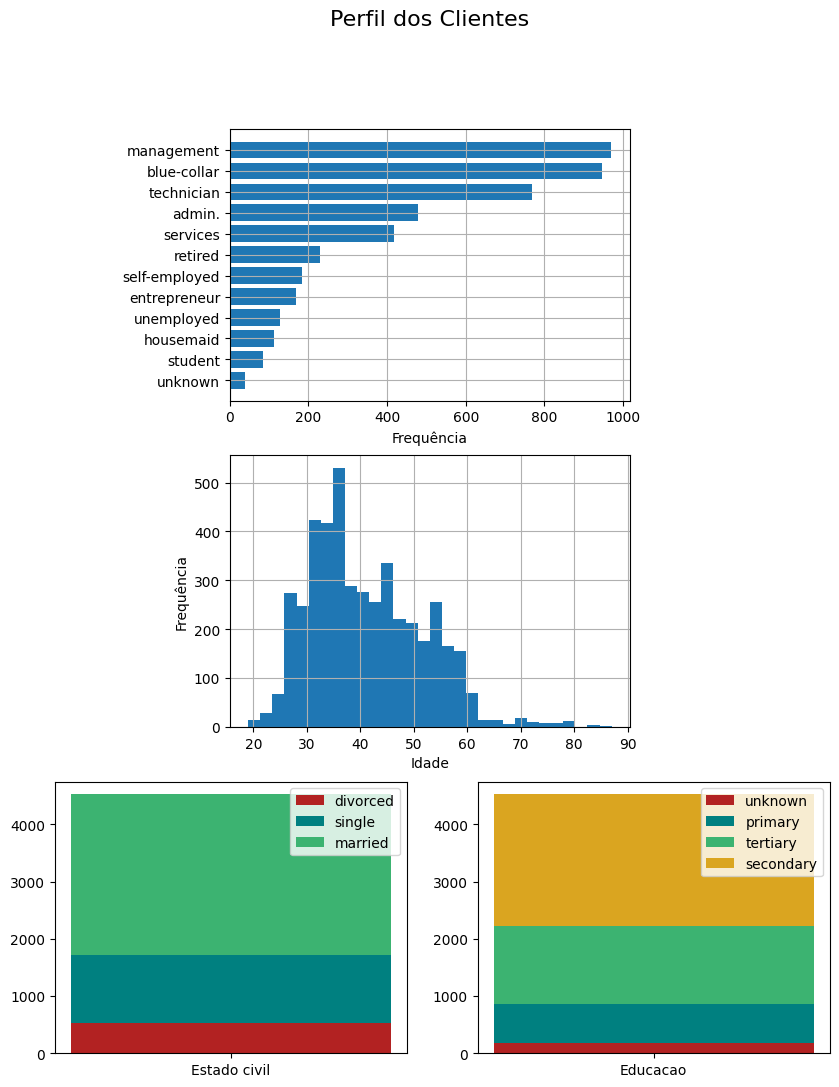

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

axes[0, 0].barh(trabalhos[np.argsort(counts)], counts[np.argsort(counts)])
# Adicionar rótulos e título
axes[0, 0].set_xlabel('Frequência')
axes[0, 0].grid()
pos1 = axes[0, 0].get_position()  # Posição atual do eixo
pos2 = axes[0, 1].get_position()  # Posição do próximo eixo

axes[0, 1].remove()  # Remove o eixo vazio na posição (0, 1)

box = axes[0, 0].get_position()
box.x0 = 0.3  # Ajuste conforme necessário para centralizar
box.x1 = 0.7  # Ajuste conforme necessário para centralizar
axes[0, 0].set_position(box)

axes[1, 0].hist(df['idade'],bins = 30)
axes[1, 0].set_xlabel('Idade')
axes[1, 0].grid()
axes[1, 0].set_ylabel('Frequência')

box = axes[1, 0].get_position()
box.x0 = 0.3  # Ajuste conforme necessário para centralizar
box.x1 = 0.7  # Ajuste conforme necessário para centralizar
axes[1, 0].set_position(box)

axes[1, 1].remove()  # Remove o eixo vazio na posição (0, 1)
axes[2,0] = category_plot(df,"estado_civil","Estado civil",axes[2,0])
axes[2,1] = category_plot(df,"educacao","Educacao",axes[2,1])

fig.suptitle("Perfil dos Clientes", fontsize=16)

plt.show()  

#category_plot(df,"educacao","Educacao")

In [14]:
def multi_category_plot(df,colunas,x_labels,titulo = ''):
    z = 0
    for coluna,x_label in zip(colunas,x_labels):
      labels,valores = np.unique(df[coluna].values,return_counts = True)
      #labels = labels[np.argsort(valores)]
      #valores = valores[np.argsort(valores)]
      categorias = [x_label]
      cores =["firebrick","teal",'mediumseagreen','goldenrod','mediumstateblue','purple']
      cores = cores[:len(labels)]
      # Criar o gráfico de barras horizontais
      cumsum_count = np.cumsum(valores)
      cumsum_count =np.insert(cumsum_count,0,0)
      for i,j,cor,label in zip(valores,cumsum_count,cores,labels):
        if(z!=0):
          plt.bar(categorias, i, color=cor,bottom = j)
        else:
          plt.bar(categorias, i, color=cor,bottom = j,label = label)
      z+= 1
    plt.legend()
    # Adicionar rótulos e título
    plt.title(titulo)
    # Exibir o gráfico
    plt.show()

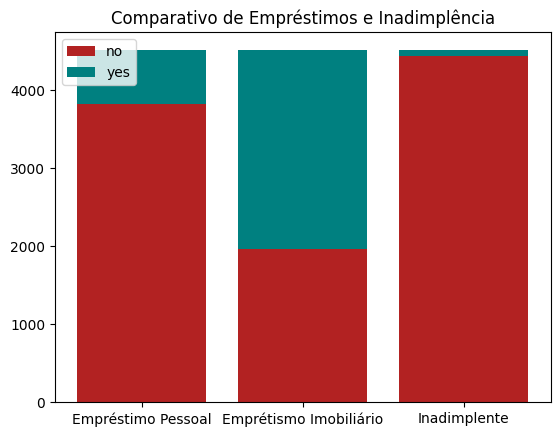

In [15]:
multi_category_plot(df,
  ['emprestimo_pessoal','emprestimo_imobiliario','inadimplente'],
  ['Empréstimo Pessoal','Emprétismo Imobiliário','Inadimplente'],
  'Comparativo de Empréstimos e Inadimplência'
)

### 2.2. Qual a relação entre o saldo e o estado civil

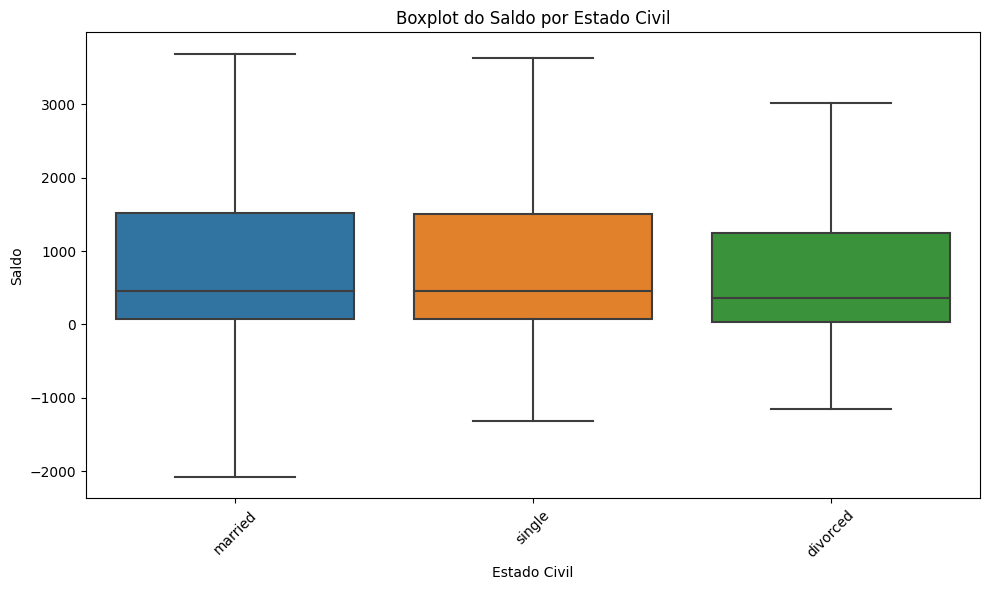

In [16]:
# Define o tamanho da figura (largura, altura)
plt.figure(figsize=(10, 6))  

# Cria um boxplot do saldo das contas correntes por estado civil
# e remove os outliers (valores extremos) para melhor visualização
sns.boxplot(data=df, x='estado_civil', y='saldo_cc', showfliers=False)
plt.title('Boxplot do Saldo por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Saldo')

# Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Ajusta o layout para evitar cortes nos rótulos e títulos
plt.tight_layout()
plt.show()

As medianas do saldo em conta corrente entre casados e solteiros são bem próximas e de divorciados é um pouco menor, a maior diferença está na amplitude entre saldos mínimos e máximos.

### 2.3. Qual a relação entre o saldo trabalho

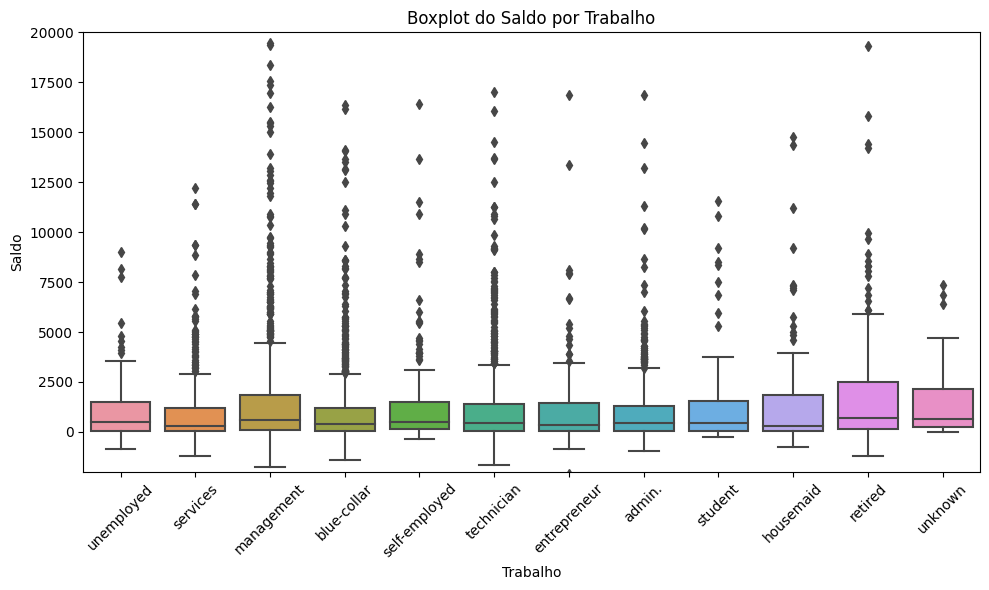

In [17]:
# Define o tamanho da figura (largura, altura)
plt.figure(figsize=(10, 6))  

# Cria um boxplot do saldo das contas correntes por trabalho
# e remove os outliers (valores extremos) para melhor visualização
sns.boxplot(data=df, x='trabalho', y='saldo_cc')
plt.title('Boxplot do Saldo por Trabalho')
plt.xlabel('Trabalho')
plt.ylabel('Saldo')
plt.ylim(bottom=-2000, top=20000)

# Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Ajusta o layout para evitar cortes nos rótulos e títulos
plt.tight_layout()
plt.show()

O gráfico de dispersão acima não destaca nenhuma categoria, porém mostra que algumas categorias possuem maior dispersão do que outras.

#### 2.1.4. Qual o saldo em conta corrente por grupo de idade?

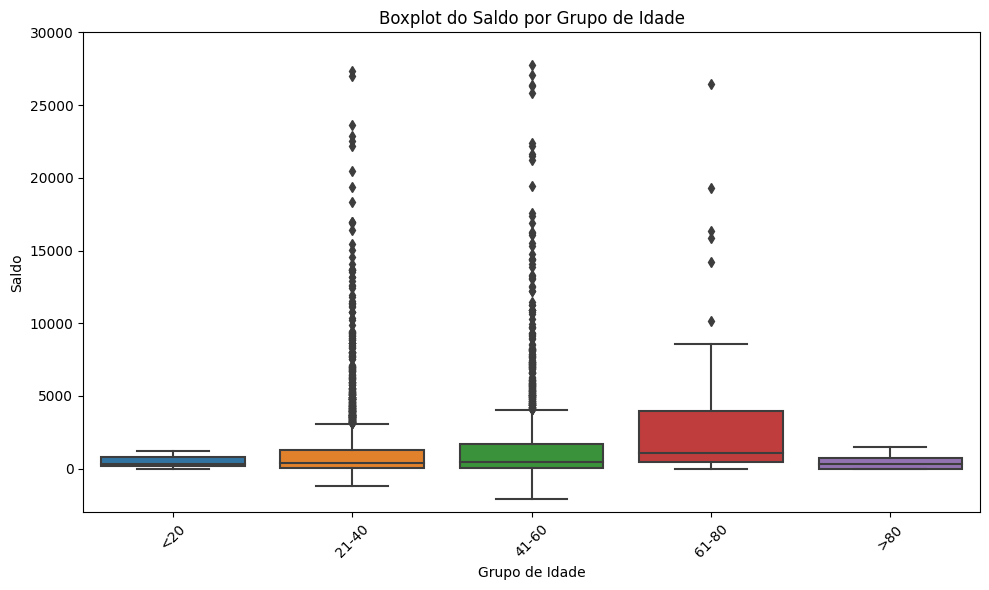

In [18]:
plt.figure(figsize=(10, 6))  

# Cria um boxplot do saldo das contas correntes por grupo de idade
# e remove os outliers (valores extremos) para melhor visualização
sns.boxplot(data=df, x='grupo_idade', y='saldo_cc')
plt.title('Boxplot do Saldo por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Saldo')
plt.ylim(bottom=-3000, top=30000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.1.5. Qual a relação entre a idade, o saldo em conta e o estado civil?

In [19]:
# Gráfico de dispersão com Plotly

import plotly.express as px

scatter_plot = px.scatter(df, x='idade', y='saldo_cc', color='estado_civil', title='Relação entre Idade e Saldo da Conta Corrente por Estado Civil',
                          labels={'idade': 'Idade', 'saldo_cc': 'Saldo da Conta Corrente', 'estado_civil': 'Estado Civil'},
                          hover_name='estado_civil')

scatter_plot.show()

## 3. Inadimplência 

### 3.1. Qual a taxa média de inadimplência por trabalho?

In [20]:
# Substitua 'yes' por 1 e 'no' por 0 na coluna 'inadimplente'
df['inadimplente'] = df['inadimplente'].replace({'yes': 1, 'no': 0})

In [21]:
# Agrupe os dados por trabalho e calcule a média da coluna inadimplente
work_default = df.groupby('trabalho')['inadimplente'].mean()

# Converta a taxa média de inadimplência em percentual
work_default = work_default.apply(lambda x: f'{x*100:.2f}%')

# Exiba os resultados
print(work_default)

trabalho
admin.           1.26%
blue-collar      1.48%
entrepreneur     4.17%
housemaid        1.79%
management       1.44%
retired          1.30%
self-employed    2.19%
services         1.68%
student          1.19%
technician       1.95%
unemployed       2.34%
unknown          0.00%
Name: inadimplente, dtype: object


Entre as categorias, empreendedores são que tem a maior taxa de inadimplência.

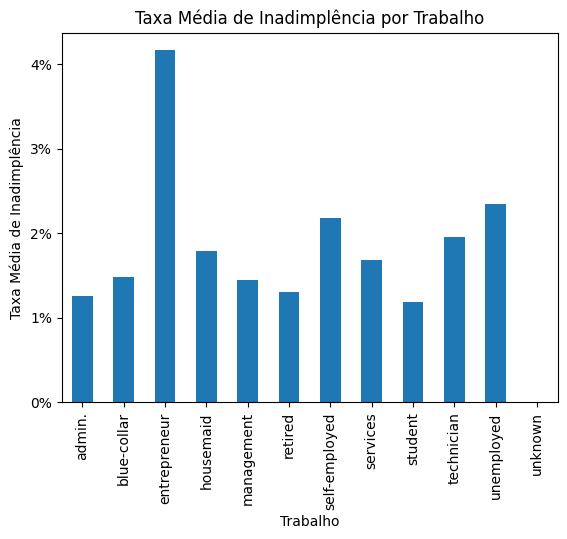

In [22]:
from matplotlib.ticker import FuncFormatter, MultipleLocator


# Agrupe os dados por trabalho e calcule a média da coluna inadimplente
work_default = df.groupby('trabalho')['inadimplente'].mean()

# Crie uma função para formatar os valores do eixo y como percentuais
def to_percent(y, position):
    return f'{y*100:.0f}%'

# Gere um gráfico de barras com os resultados
work_default.plot(kind='bar')
plt.title('Taxa Média de Inadimplência por Trabalho')
plt.xlabel('Trabalho')
plt.ylabel('Taxa Média de Inadimplência')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.01))
plt.show()

### 3.2. Qual a taxa de inadimplência por grau de instrução?

In [23]:
# Agrupe os dados por trabalho e calcule a média da coluna inadimplente
education_default = df.groupby('educacao')['inadimplente'].mean()

# Converta a taxa média de inadimplência em percentual
education_default = education_default.apply(lambda x: f'{x*100:.2f}%')

# Exiba os resultados
print(education_default)

educacao
primary      1.47%
secondary    1.99%
tertiary     1.26%
unknown      1.60%
Name: inadimplente, dtype: object


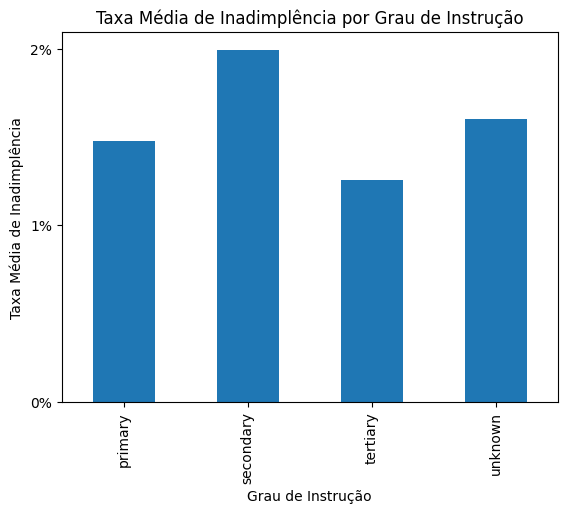

In [24]:
# Agrupe os dados por educação e calcule a média da coluna inadimplente
education_default = df.groupby('educacao')['inadimplente'].mean()

# Crie uma função para formatar os valores do eixo y como percentuais
def to_percent(y, position):
    return f'{y*100:.0f}%'

# Gere um gráfico de barras com os resultados
education_default.plot(kind='bar')
plt.title('Taxa Média de Inadimplência por Grau de Instrução')
plt.xlabel('Grau de Instrução')
plt.ylabel('Taxa Média de Inadimplência')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.01))
plt.show()

Apesar de ilustrar quais grupos de instrução tem mais inadimplência, provavelmente este não seja o comparativo ideal, porque a variação entre cada grupo é bem próxima uma da outra, menor que 1%.

In [25]:
mais_novo = df['idade'].min()
print('menor idade:', mais_novo)
mais_velho = df['idade'].max()
print('maior idade:', mais_velho)

menor idade: 19
maior idade: 87


In [26]:
# Substitua 'yes' por 1 e 'no' por 0 na coluna 'emprestimo_imobiliario'
df['emprestimo_imobiliario'] = df['emprestimo_imobiliario'].replace({'yes': 1, 'no': 0})

# Substitua 'yes' por 1 e 'no' por 0 na coluna 'emprestimo_pessoal'
df['emprestimo_pessoal'] = df['emprestimo_pessoal'].replace({'yes': 1, 'no': 0})

Entre os vinte e um e sessenta são os que mais fazem empréstimos imobiliários. Pode ser justificado por ser a faixa etária em que as pessoas deixam de morar na casa dos pais e buscam independência e também a faixa em que as pessoas costumam casar e construir família.

### 3.3. Qual grupo de idade inside maior inadimplência?

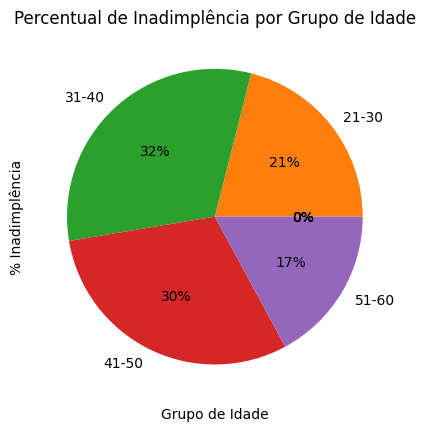

In [27]:
# Divida a coluna idade em grupos de idade
df['grupo_idade'] = pd.cut(df['idade'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 100], labels=['<20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>80'])

# Calcula a quantidade de inadimplentes em cada grupo de idade
age_default = df.groupby('grupo_idade')['inadimplente'].sum()

# Cria um gráfico de pizza (pie chart) para mostrar o percentual de inadimplentes por grupo de idade
age_default.plot(kind='pie', autopct='%1.0f%%') # 'autopct' exibe as porcentagens no gráfico
plt.title('Percentual de Inadimplência por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('% Inadimplência')
plt.show()

Entre os trinta e um e cinquenta anos são os que possuem maior taxa de inadimplência. Observação: Gráficos de pizza podem causar uma percepção errônea da quantidade relatica em cada grupo, por exemplo, nesse caso a parte em vermelho pode parecer maior que a verde e isso pode levar a conclusões equivocadas. Porém, foi utilizado nessa situação porque os valores em porcentagem estão presentes em suas respectivas áreas.

### 3.4. Em quais grupos de idade há maior concentração de inadimplentes?

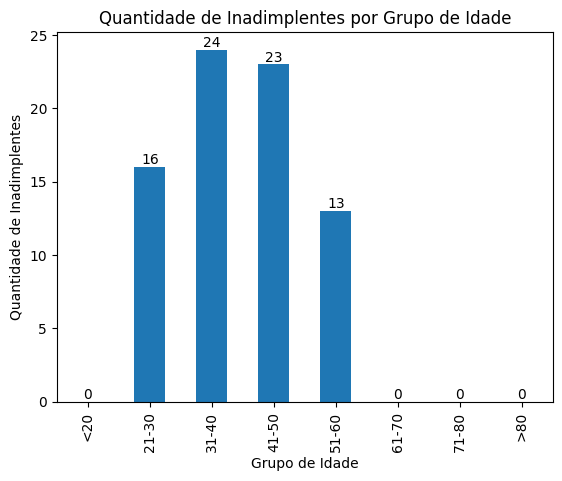

In [28]:
# Cria um gráfico de barras para mostrar a quantidade de inadimplentes por grupo de idade
plot = age_default.plot.bar()

# Adiciona rótulos com os valores das barras no gráfico
plt.bar_label(plot.containers[0])
plt.title('Quantidade de Inadimplentes por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Quantidade de Inadimplentes')
plt.show()

In [29]:
#Verifica saldo mínimo e máximo
saldo_min = df['saldo_cc'].min()
print('Saldo mínimo: ', saldo_min)
saldo_max = df['saldo_cc'].max()
print('Saldo máximo: ', saldo_max)

Saldo mínimo:  -3313
Saldo máximo:  71188


### 3.5. Qual o percentual de inadimplência?

Total de inadimplência: 76
Quantidade total de empréstimos: 3250


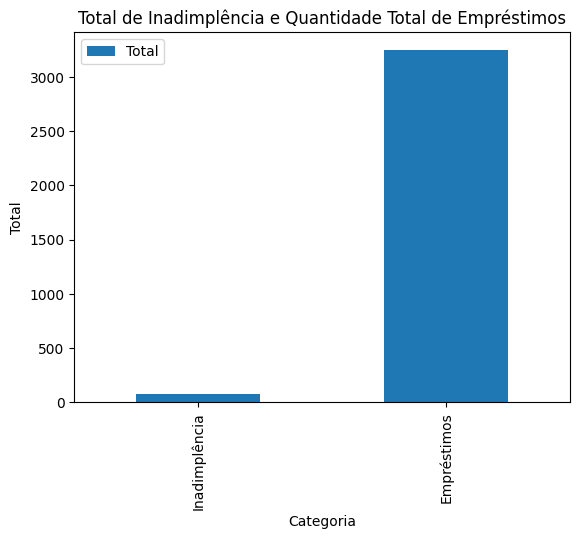

In [30]:
# Calcule o total de inadimplência
total_default = df['inadimplente'].sum()

# Calcule a quantidade total de empréstimos
total_loans = df[['emprestimo_imobiliario', 'emprestimo_pessoal']].sum().sum()

# Exiba os resultados
print(f'Total de inadimplência: {total_default}')
print(f'Quantidade total de empréstimos: {total_loans}')

# Crie um dataframe com os resultados
data = pd.DataFrame({'Total': [total_default, total_loans]}, index=['Inadimplência', 'Empréstimos'])

# Gere um gráfico de barras com os resultados
data.plot(kind='bar')
plt.title('Total de Inadimplência e Quantidade Total de Empréstimos')
plt.xlabel('Categoria')
plt.ylabel('Total')
plt.show()

In [31]:
tx_inadimplencia = total_default / total_loans
print(f'Percentual de inadimplência: {tx_inadimplencia*100:.2f}%')

Percentual de inadimplência: 2.34%


A cada cem empréstimos há por volta de duas pessoas inadimplentes.

### 3.6. Qual a inadimplência por saldo na conta

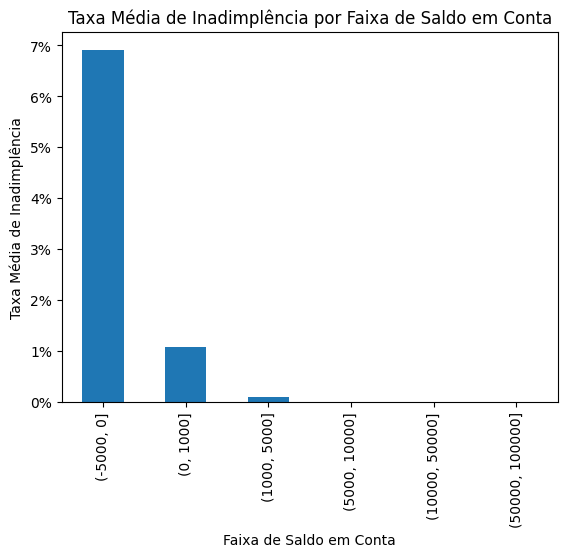

In [32]:
# Divida a coluna 'saldo_cc' em grupos
df['grupo_saldo'] = pd.cut(df['saldo_cc'], bins=[-5000, 0, 1000, 5000, 10000, 50000, 100000])

# Agrupe os dados por grupo de saldo e calcule a média da coluna inadimplente
balance_default = df.groupby('grupo_saldo')['inadimplente'].mean()

# Gere um gráfico de barras com os resultados
balance_default.plot(kind='bar')
plt.title('Taxa Média de Inadimplência por Faixa de Saldo em Conta')
plt.xlabel('Faixa de Saldo em Conta')
plt.ylabel('Taxa Média de Inadimplência')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.01))
plt.show()

#### 3.7. Qual a inadimplência por estado civil?

Text(0, 0.5, 'Quantitade Total de Inadimplentes')

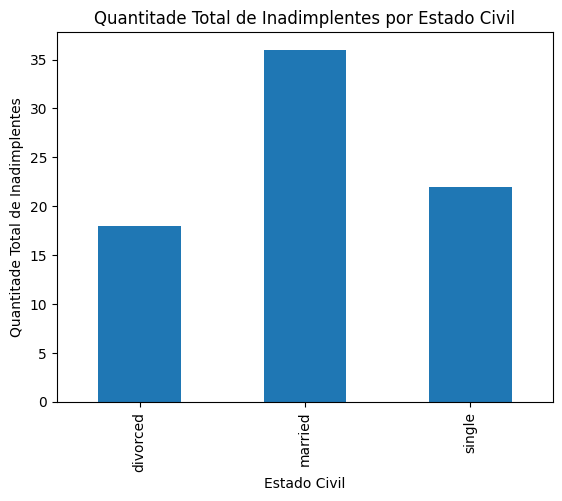

In [33]:
# Agrupa os dados por estado civil e calcule a soma das colunas de inadimplente
marital_default = df.groupby('estado_civil')['inadimplente'].sum()

# Gere um gráfico de barras com os resultados
marital_default.plot(kind = 'bar')
plt.title('Quantitade Total de Inadimplentes por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Quantitade Total de Inadimplentes')

Nota-se que casados são os que representam os que são mais inadimplentes em quantidade

### 3.8. Qual grupo teve maior percentual de inadimplência?

In [34]:
#Agrupar o estado civil pelo número de inadimplentes
percentual_agrupado = df.groupby('estado_civil')['inadimplente'].agg(['sum', 'count']).reset_index()

#Calcula percentual relativo entre quantidade da categoria do estado civil
percentual_agrupado['percentual_relativo'] = percentual_agrupado['sum']/percentual_agrupado['count']

#Formata para %
percentual_agrupado['percentual_relativo'] = percentual_agrupado['percentual_relativo'].apply(lambda x: f'{x*100:.2f}%')

percentual_agrupado

,estado_civil,sum,count,percentual_relativo
0,divorced,18,528,3.41%
1,married,36,2797,1.29%
2,single,22,1196,1.84%


Em números absolutos casados são os que representam maior número de inadimplentes, entretanto é preciso observar o valor relativo entre a quantidade de inadimplentes pela quantidade de empréstimos por cada categoria. Com isso, pode-se concluir que os divorciados são os com maior taxa de inadimplência.

## 4. Empréstimos

### 4.1. Qual a finalidade dos empréstimos por grupo de idade?

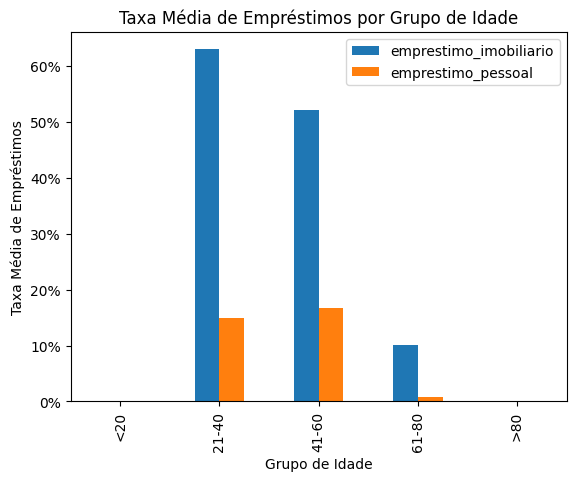

In [35]:
# Divida a coluna idade em grupos de idade
df['grupo_idade'] = pd.cut(df['idade'], bins=[0, 20, 40, 60, 80, 100], labels=['<20', '21-40', '41-60', '61-80', '>80'])

# Agrupe os dados por grupo de idade e calcule a soma das colunas de empréstimo
age_loan = df.groupby('grupo_idade')[['emprestimo_imobiliario', 'emprestimo_pessoal']].mean()

# Gere um gráfico de barras com os resultados
age_loan.plot(kind='bar')
plt.title('Taxa Média de Empréstimos por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Taxa Média de Empréstimos')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.show()

### 4.2. Qual a taxa de empréstimos por estado civil

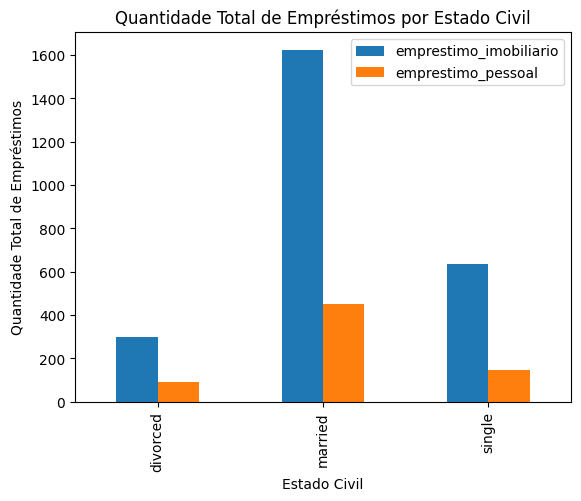

In [36]:
# Agrupe os dados por estado civil e calcule a soma das colunas de empréstimo
marital_loan = df.groupby('estado_civil')[['emprestimo_imobiliario', 'emprestimo_pessoal']].sum()

# Gere um gráfico de barras com os resultados
marital_loan.plot(kind='bar')
plt.title('Quantidade Total de Empréstimos por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade Total de Empréstimos')
plt.show()

A maior parte dos empréstimos são do tipo imobiliário. O grupo dos casados são os que mais tomam empréstimos, seja imobiliário ou pessoal. Sendo que é o grupo com mais emprétimos imobiliários também. Pode ser justificado pelo mesmo motivo dos empréstimos por grupo de idade, ou seja, é o perfil com objetivo de idempendência e construção familiar.

### 4.3. Qual a taxa de empréstimos por nível de educação

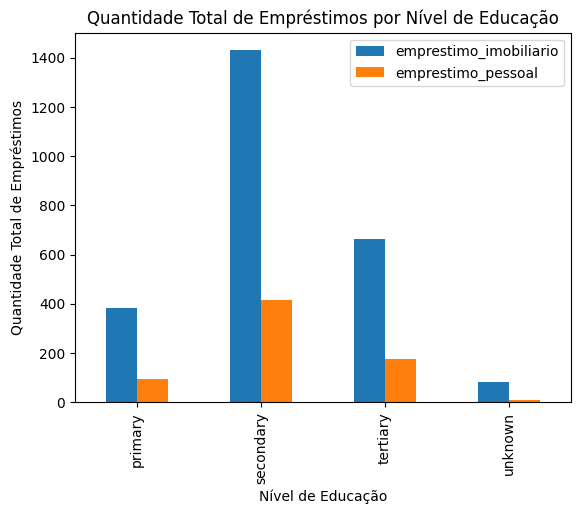

In [37]:
# Agrupamento dos dados de Educação e, em seguida, cálculo da soma das colunas de empréstimo
education_loan = df.groupby('educacao')[['emprestimo_imobiliario', 'emprestimo_pessoal']].sum()

# Gráfico de barras mostrando a quantidade total de empréstimos de acordo com o nível de educação
education_loan.plot(kind='bar')
plt.title('Quantidade Total de Empréstimos por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Quantidade Total de Empréstimos')
plt.show()

### 4.4. Qual a taxa de empréstimos por trabalho

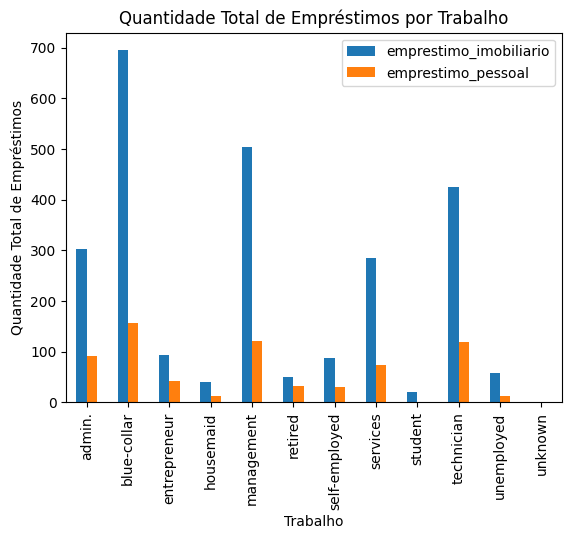

In [38]:
# Agrupamento dos dados de Trabalho e, em seguida, cálculo da soma das colunas de empréstimo
job_loan = df.groupby('trabalho')[['emprestimo_imobiliario', 'emprestimo_pessoal']].sum()

# Gráfico de barras mostrando a quantidade total de empréstimos de acordo com o trabalho
job_loan.plot(kind='bar')
plt.title('Quantidade Total de Empréstimos por Trabalho')
plt.xlabel('Trabalho')
plt.ylabel('Quantidade Total de Empréstimos')
plt.show()

## 5. Contato

### 5.1. Qual a duração média do contato por resultado

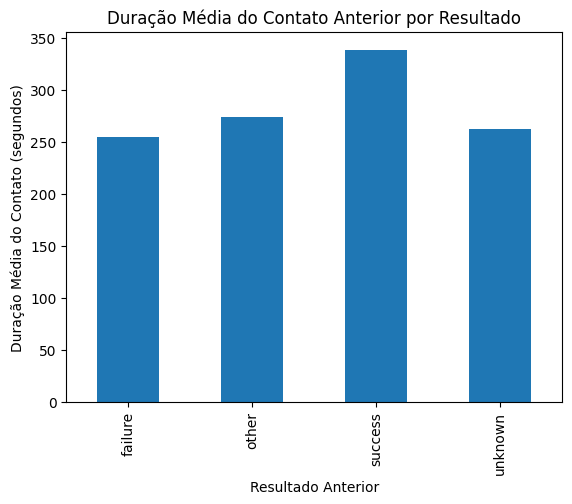

In [39]:
# Agrupe os dados por resultado anterior e calcule a média da coluna duracao
result_duration = df.groupby('resultado_anterior')['duracao'].mean()

# Gere um gráfico de barras com os resultados
result_duration.plot(kind='bar')
plt.title('Duração Média do Contato Anterior por Resultado')
plt.xlabel('Resultado Anterior')
plt.ylabel('Duração Média do Contato (segundos)')
plt.show()

In [ ]:
import sweetviz as sv

# Criar um relatório utilizando o Sweetviz
report = sv.analyze(df, target_feat='inadimplente')

report.show_html()